##Preparing dependences

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [63]:
df= pd.read_csv("data.csv" ,encoding='unicode_escape')
df

,Id,Full_Names,claass,mean_subject
0,1,Thai Phuc An,45078,3.9
1,2,Nguyen Thanh Sang,45078,4.4
2,3,Pham Chi Thanh,45078,3.3
3,4,Nguyen Gia Bao,45079,3.9
4,5,Luong Nguyen Quynh Phat,45079,4.7
5,6,Le Minh Sang,45079,2.7
6,7,Nguyen Hoang Phuc Thinh,45079,3.9
7,8,Hoan Ngoc Nhu Y,45079,3.6
8,9,Tran Ha Tuan Kiet,45086,4.7
9,10,Bui Nhan Nghia,45086,4.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            30 non-null     int64  
 1   Full_Names    30 non-null     object 
 2   claass        30 non-null     int64  
 3   mean_subject  30 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ KB


In [ ]:
df["cluster"] = (df["mean_subject"] <= float(3.5)).astype(int)
# print(df[df["cluster"] == 0] , df[df["cluster"] == 1]  )
print(sum(df["cluster"] == 0) , sum(df["cluster"] == 1)  )


23 7


In [ ]:
df.head()

,Id,Full_Names,claass,mean_subject,cluster
0,1,Thai Phuc An,45078,3.9,0
1,2,Nguyen Thanh Sang,45078,4.4,0
2,3,Pham Chi Thanh,45078,3.3,1
3,4,Nguyen Gia Bao,45079,3.9,0
4,5,Luong Nguyen Quynh Phat,45079,4.7,0


In [ ]:
### Preprocessing data to train 

## Train / Test  / Valid Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier  , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle

In [ ]:
X = df.drop(["cluster" ] , axis = 1)
y = df["cluster"]
print(X)


float64


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y ,test_size = 0.25 , random_state = 10 )
x_val , x_test , y_val , y_test = train_test_split(x_test , y_test ,test_size = 0.8 , random_state = 10 )

print(x_train.shape , y_train.shape , x_test.shape , y_test.shape , x_val.shape , y_val.shape)

(22, 3) (22,) (7, 3) (7,) (1, 3) (1,)


In [ ]:
g_model = SVC()
g_model.fit(x_train ,y_train)
r_model = AdaBoostClassifier()
r_model.fit(x_train , y_train)

AdaBoostClassifier()

In [ ]:
y_pred = r_model.predict(x_test)

In [ ]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7



In [ ]:
with open("model.pkl" , "wb") as f:
  pickle.dump(r_model , f)

In [ ]:
with open("model.pkl" ,"rb") as f:
  model_load = pickle.load(f)

In [ ]:
model_load.predict(x_val)

array([0])

## Predict into mean_subject

In [135]:
df= pd.read_csv("data.csv" ,encoding='unicode_escape')
df_test = df.copy()

In [160]:
X = df_test.drop(["mean_subject"] , axis = 1)
y = df_test["mean_subject"]
X
y

0     3.9
1     4.4
2     3.3
3     3.9
4     4.7
5     2.7
6     3.9
7     3.6
8     4.7
9     4.7
10    4.6
11    4.9
12    3.7
13    4.7
14    4.8
15    3.8
16    3.7
17    3.3
18    3.7
19    3.8
20    4.6
21    4.9
22    3.6
23    4.2
24    1.5
25    4.5
26    2.5
27    3.5
28    3.9
29    1.9
Name: mean_subject, dtype: float64

In [142]:
full_names = df_test["Full_Names"].values
class_df = df_test["claass"].values
Id  = df["Id"].values
#print( full_names , class_df , Id)
df_test["Id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [122]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [161]:
coder = LabelEncoder()

X["Full_Names"] = coder.fit_transform(X["Full_Names"])
X = X.astype(float)
y

0     3.9
1     4.4
2     3.3
3     3.9
4     4.7
5     2.7
6     3.9
7     3.6
8     4.7
9     4.7
10    4.6
11    4.9
12    3.7
13    4.7
14    4.8
15    3.8
16    3.7
17    3.3
18    3.7
19    3.8
20    4.6
21    4.9
22    3.6
23    4.2
24    1.5
25    4.5
26    2.5
27    3.5
28    3.9
29    1.9
Name: mean_subject, dtype: float64

In [115]:
test_model = LinearRegression()
test_model.fit(X , y.values)

LinearRegression()

In [116]:
y_pred = test_model.predict(X)

In [120]:
print(np.sqrt(mean_squared_error(y_pred , y.values)))

0.7649379800142004


In [128]:
main_model =DecisionTreeRegressor(random_state = 5)
main_model.fit(X , y.values)

DecisionTreeRegressor(random_state=5)

In [129]:
y_pred = main_model.predict(X)
print(mean_squared_error(y_pred , y.values))

0.0


In [131]:
data = {"model" : main_model , "coder" : coder}
with open("model2.pkl" , "wb") as f:
  pickle.dump(data , f)

In [132]:
with open("model2.pkl" , "rb") as f:
  load_model = pickle.load(f)

In [133]:
load_model["model"]

DecisionTreeRegressor(random_state=5)

In [162]:
# X = np.array([[1 , "Anh Hung" , 45078]])
# X[: , 1] = LabelEncoder().fit_transform(X[: , 1])
# X = X.astype(float)

load_model["model"].predict(X)

array([3.9, 4.4, 3.3, 3.9, 4.7, 2.7, 3.9, 3.6, 4.7, 4.7, 4.6, 4.9, 3.7,
       4.7, 4.8, 3.8, 3.7, 3.3, 3.7, 3.8, 4.6, 4.9, 3.6, 4.2, 1.5, 4.5,
       2.5, 3.5, 3.9, 1.9])

## Plot about the data

In [164]:
df_pl = df

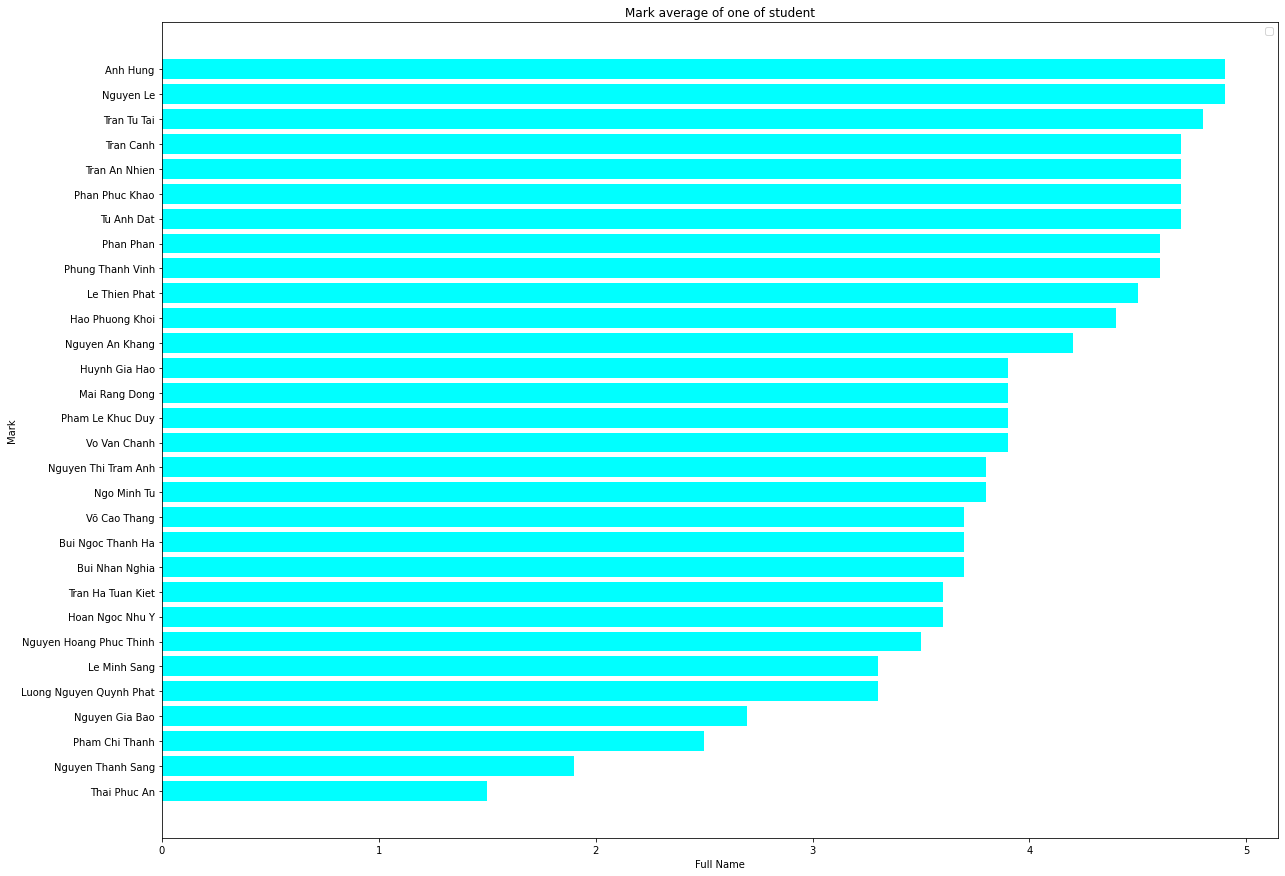

In [188]:
cols = df_pl.columns
plt.subplots(figsize = (20, 15))
plt.barh(df_pl[cols[1]].values , df_pl["mean_subject"].sort_values().values , color = "cyan"   )
plt.title("Mark average of one of student")
plt.xlabel("Full Name")
plt.ylabel("Mark")
plt.legend()
plt.show()

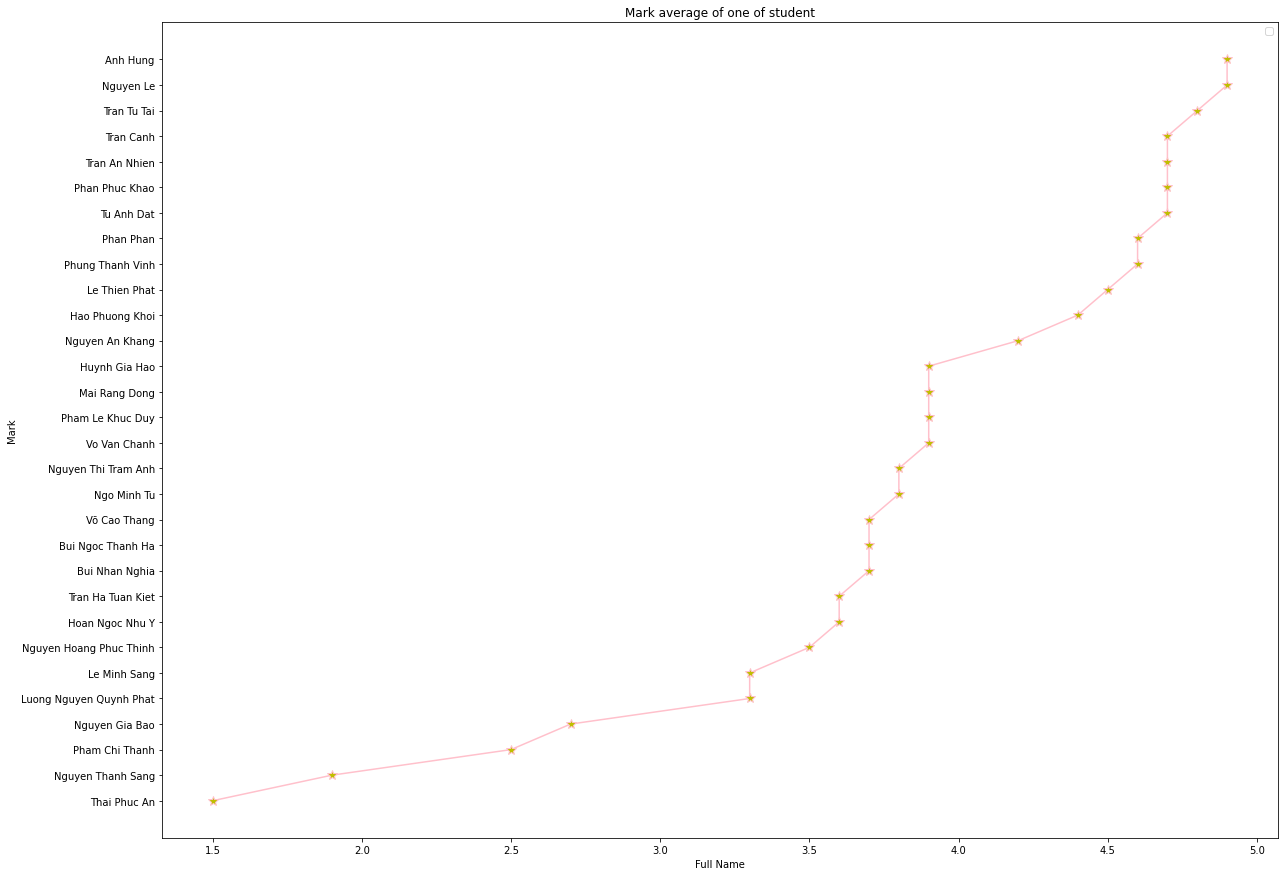

In [197]:
cols = df_pl.columns
plt.subplots(figsize = (20, 15))
plt.plot(df_pl["mean_subject"].sort_values().values , df_pl[cols[1]].values , 
         color = "pink" , marker = "*" , ms = 10 , mfc = "y"  )
plt.title("Mark average of one of student")
plt.xlabel("Full Name")
plt.ylabel("Mark")
plt.legend()
plt.show()

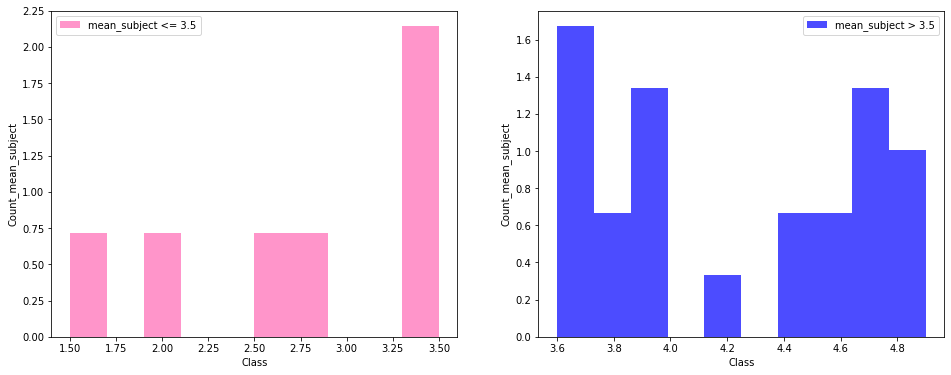

In [218]:
x_num = len(df_pl[df_pl["mean_subject"] <= 3.5])
y_num = len(df_pl[df_pl["mean_subject"] > 3.5])
fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (16 , 6))
ax1.hist(df_pl[df_pl["mean_subject"] <= 3.5]["mean_subject"] , label="mean_subject <= 3.5"  , color = "hotpink" , density = True , alpha = 0.7)
ax1.set_xlabel("Mean_subject")
ax1.set_ylabel("Count_mean_subject")
ax1.legend()


ax2.hist(df_pl[df_pl["mean_subject"] > 3.5]["mean_subject"] , label="mean_subject > 3.5"  , color = "blue" , density = True , alpha = 0.7)
ax2.set_xlabel("Mean_subject")
ax2.set_ylabel("Count_mean_subject")
ax2.legend()

plt.show()